In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
data = pd.read_csv("Salary.csv")
data.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [18]:
X = data[['YearsExperience']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = model.predict(X_test)


In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Accuracy:", accuracy, "%")


Mean Squared Error: 55761791.306260146
R² Score: 0.8914234140042779
Accuracy: 89.1423414004278 %


In [22]:
years = [3, 5, 10, 15]

predictions = []

for y in years:
    salary = model.predict([[y]])[0]
    predictions.append([y, salary])
    print(f"Predicted salary for {y} years: ₹{salary:.2f}")


Predicted salary for 3 years: ₹54814.93
Predicted salary for 5 years: ₹71972.46
Predicted salary for 10 years: ₹114866.30
Predicted salary for 15 years: ₹157760.14


c:\Users\AMLAN PATRA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\AMLAN PATRA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\AMLAN PATRA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\AMLAN PATRA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Users\AMLAN PATRA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


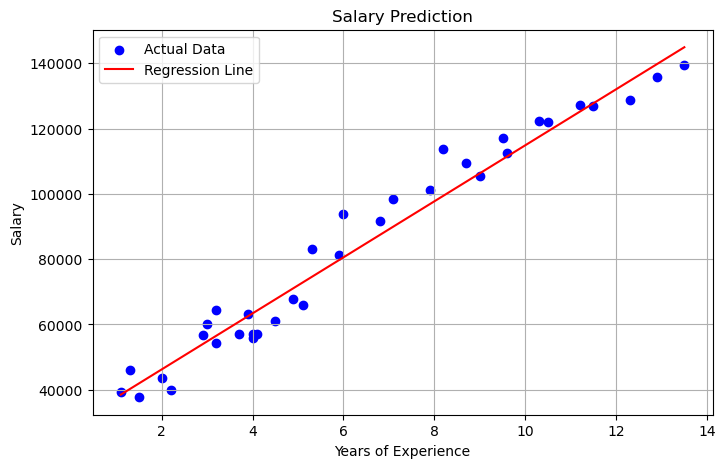

In [25]:
plt.figure(figsize=(8,5))

plt.scatter(data["YearsExperience"], data["Salary"], color="blue", label="Actual Data")

X_line = np.linspace(data["YearsExperience"].min(),
                     data["YearsExperience"].max(), 100).reshape(-1,1)

y_line = model.predict(X_line)

plt.plot(X_line, y_line, color="red", label="Regression Line")

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
results = pd.DataFrame(predictions, columns=["YearsExperience", "PredictedSalary"])

results.to_excel("salary_predictions.xlsx", index=False)

print("Excel file saved: salary_predictions.xlsx")


Excel file saved: salary_predictions.xlsx
